# Exercise: Shortest $s$-$t$-path 
<font color='blue'><b>Goal:</b></font>
Computing the $s$-$t$ distance through linear programming in two different ways.

<font color='blue'><b>Required packages:</b></font>`pulp`, `networkx`, `random`, `matplotlib`

We are given a directed graph $G=(V,A)$ with arc lengths $\ell: A \to \mathbb{Z}_{\geq 0}$, and two distinct vertices $s,t\in V$. Our goal is to compute the $s$-$t$ distance $\mathrm{d}(s,t)$, i.e., the distance from $s$ to $t$ in $G$, which is defined by

\begin{equation*}
\mathrm{d}(s,t) := \min\left\{\sum_{a\in P} \ell(a) : \text{ $P\subseteq A$, $P$ is an $s$-$t$ path in $G$}  \right\}\enspace.
\end{equation*}

To achieve this, let us use linear programming!

## Toy example instance

Let us start with an easy example. For your convenience, we created a module `shortestPath_module`, which includes some functionality for generating and drawing graphs. Execute the code below to generate and plot a toy example instance. Find a shortest $s$-$t$-path manually!

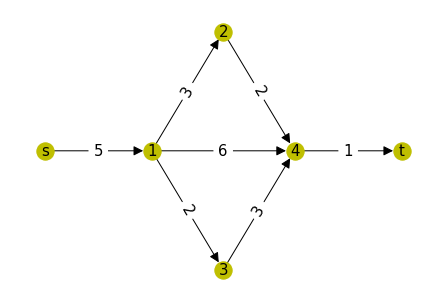

In [1]:
# Import the module
import shortestPath_module as helpers
%matplotlib inline

# Generates and plots example graph
G = helpers.toy_example()
helpers.draw(G)

## An LP-approach

Consider the linear programming formulation seen in class, namely

$$
\begin{array}{rrcll}
\max & d_t \\
     & d_s & = & 0 \\
     & d_v & \leq & d_u + \ell(a) & \forall a=(u,v)\in A \\
     & d_v & \geq & 0 & \forall v\in V\enspace.
\end{array}
$$

Recall that it is proved in the script that the optimal value of the above linear program is indeed equal to the distance $\mathrm{d}(s,t)$. Check the script for all details!

<font color='blue'><b>Your task:</b></font> 

Implement this method to find $\mathrm{d}(s,t)$ via the above linear program in a function

    def distanceSToT(G,s,t)

where $G$ is a directed graph as shown in the toy example above that has an edge attribute named `"length"` storing the edge lengths, and $s$ and $t$ are two distinct vertices of the graph. The function should return the distance $\mathrm{d}(s,t)$ from $s$ to $t$.
      


In [45]:
def distanceSToT(G):
    # IMPLEMENT YOUR FUNCTION HERE
    import networkx as nx
    # create a dictionary of variable representing the distance to the source d(a)
    node = dict([ [a, pulp.LpVariable(f"distance to source {a}", lowBound=0)] for a in G.nodes])
    shortest_path = pulp.LpProblem("shortest_Path", pulp.LpMaximize)
    objective = node["t"]
    shortest_path.setObjective(objective)
    node["s"] = 0
    for edge in G.edges:
        v = edge[0]
        u = edge[1]
        distance = nx.get_edge_attributes(G, "length")[v,u]
        #print(distance)
        shortest_path.addConstraint(node[u] <= node[v] + distance, f"triangle contraint on {edge}")
    shortest_path.constraints
    shortest_path.solve()
    dst = shortest_path.objective.value()
    return dst

## Testing your implementation

### Check on the toy example

First check on the toy example given above that your procedures computes the correct $s$-$t$ distance by executing the code below. Did you get it right when doing it manually?

In [42]:
helpers.check(distanceSToT, G)

5
3
2
6
2
3
1
Your algorithm computes an s-t distance of 11.0.
The actual s-t distance is 11.

Congratulations! Your implementation is correct on the given instance.


### Checks on a random instance

Next, check that your procedure also returns the same $s$-$t$ distance on a randomly generated graph by executing the code below. Note that the generated random graphs might not have an $s$-$t$ path, at all. Just rerun the cell to generate a new one!

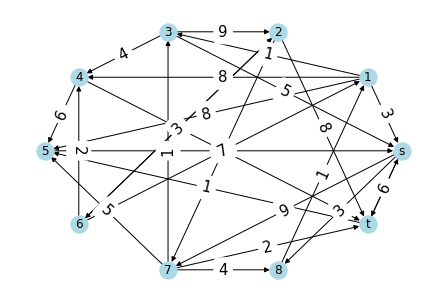

Your algorithm computes an s-t distance of 2.0.
The actual s-t distance is 2.

Congratulations! Your implementation is correct on the given instance.


In [47]:
# Randomly generate G with given number of nodes
G = helpers.random_graph(10)

# Draw G
helpers.draw(G)

# Check the implementation on G
helpers.check(distanceSToT, G)